# Assignment 2 Group27
* Daniyal Khalid 03748318
* Saqib Ali Khan 03750897
* Mujtaba Shahid Faizi 03749649
* Utku Ayvaz 03690266
* Weixing Wang 03698938

## Task 1)

### a)

$ \Sigma \Sigma ^\intercal = \begin{bmatrix}
\sigma_{11}^{2} & & & \\
 & \sigma_{22}^{2} & & \\
 & & & \ddots & \\
 & & & & \sigma_{pp}^{2}\\
\end{bmatrix}$

where $ \sigma_{11} \geq \sigma_{22} \geq ... \geq \sigma_{pp}
$

Therefore, $ s ^\intercal = [1\ 0\ 0\ ...\ 0] $ will maximize
$ s ^\intercal \Sigma \Sigma ^\intercal s $ with max value $\sigma_{11}^{2}$

### b)

$a^\intercal X X^\intercal a = a ^\intercal U \Sigma V ^\intercal V \Sigma ^\intercal U ^\intercal a
= a ^\intercal U \Sigma \Sigma ^\intercal U ^\intercal a
$

Let $s ^\intercal = a ^\intercal U$

Then, from part a, we know that the max value will occur when $a ^\intercal U = [1\ 0\ 0\ ...\ 0]$

If $ a = u_{1}$, where $u_{1}$ is the first column of the $U$ matrix then

$a ^\intercal U = [u_{1}^{T}.u_{1}\ \ u_{1}^{T}.u_{2}\ \ u_{1}^{T}.u_{3}\ \ ...\ \ u_{1}^{T}.u_{p}] = [1\ 0\ 0\ ...\ 0]$
due to orthonormality of $U$

Therefore, max values occur at $a = u_{1}$

## Task 2)

In [26]:
Training_path = "./yaleBfaces/subset0"
Test_path = "./yaleBfaces/subset"

### First part

In [27]:
import os
import imageio
import numpy as np

# Load and center training data
dir_list = os.listdir(Training_path)
Training_Input=np.zeros((2500,len(dir_list)))
Centered_Training_Input=np.zeros((2500,len(dir_list)))
for num, i in enumerate(dir_list):
    png_path = "/"+i
    current_img = np.float64(imageio.imread(Training_path+png_path).ravel())
    Training_Input[:,num] = current_img
    
Normed_Training_Input = (Training_Input - np.mean(Training_Input, axis=0)) / np.std(Training_Input, axis=0)

In [28]:
# Helper function to get the first 20 columns of U from SVD
def get_U(T):
    [U,Sigma,VT]=np.linalg.svd(T,full_matrices=False)
    return U[:,0:20]

In [29]:
U = get_U(Normed_Training_Input)

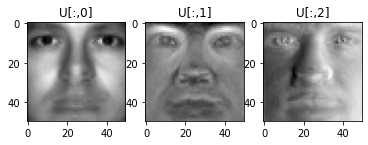

In [30]:
# Visualize the first three components
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
plt.imshow(U[:,0].reshape(50,50), cmap='gray')
plt.title('U[:,0]')
plt.subplot(1,3,2)
plt.imshow(U[:,1].reshape(50,50), cmap='gray')
plt.title('U[:,1]')
plt.subplot(1,3,3)
plt.imshow(U[:,2].reshape(50,50), cmap='gray')
plt.title('U[:,2]')
plt.show()

### Second Part

In [31]:
# Helper function to load labels of a subset
def get_labels(path):
    labels = np.zeros(len(os.listdir(path)))
    for num, name in enumerate(os.listdir(path)):
        labels[num] = int(name[6:8])
    return labels

### Prepare training labels

In [32]:
Training_output = get_labels(Training_path)

### Prepare Test Data

In [33]:
# Load all test subsets along with their labels
All_Test_Data = {}
for subset_num in range(1,5):
    current_test_path = Test_path+str(subset_num)
    dir_list = os.listdir(current_test_path)
    current_Test_Input=np.zeros((2500,len(dir_list)))
    for num, i in enumerate(dir_list):
        png_path = "/"+i
        current_img = np.float64(imageio.imread(current_test_path+png_path).ravel())
        current_Test_Input[:,num] = current_img
        
    current_Test_Output = get_labels(current_test_path)
    Input_Name = "Input"+str(subset_num)
    Output_Name = "Output"+str(subset_num)
    All_Test_Data[Input_Name] = current_Test_Input
    All_Test_Data[Output_Name] = current_Test_Output

In [34]:
# Function to get predictions for a test subset from the training subset and to calculate the error percentage
def test_pca(Train_Input, Train_Output, S, Test_Output, U, k):
    # get the first k PCs
    current_U = U[:,0:k]
    # project T and S onto subspace
    Projected_Train_Input = current_U.T@Train_Input
    Projected_Test_Input = current_U.T@S
    
    error = 0.0
    # Get the prediction for each item of the test subset and increment error if it does not match the label
    for num in range(Projected_Test_Input.shape[1]):
        current_test = np.expand_dims(Projected_Test_Input[:,num],axis=1)
        # calculate distance
        euc_dist = np.linalg.norm(current_test-Projected_Train_Input,axis=0)
        #k-Nearest Neighbor (in our case k=3)
        idx = np.argpartition(euc_dist, 3)
        pointer = np.zeros(10)
        for i in idx[:3]:
            pointer[int(Train_Output[i]-1)] += 1 
        # choose a random class when we get three 1s
        if list(pointer).count(1)==3:
            selected = np.random.choice(idx[:3],1)
            winner = int(Train_Output[selected])
        else:
            winner = np.argmax(pointer)+1
        if winner != Test_Output[num]:
            error+=1
    return error/Projected_Test_Input.shape[1]

In [35]:
# Get the error for all subsets, for k = 1 to 20 within each subset
Error_Results = np.zeros((20,4))
for subset_num in range(1,5):
    Input_Name = "Input"+str(subset_num)
    Output_Name = "Output"+str(subset_num)
    
    Test_Input = All_Test_Data[Input_Name]
    Test_Output = All_Test_Data[Output_Name]
    for k in range(1,21):
        Error_Results[k-1,subset_num-1] = test_pca(Training_Input, Training_output, Test_Input, Test_Output, U, k)
print("Best Error")
print(np.min(Error_Results, axis=0))

Best Error
[0.         0.15833333 0.65714286 0.85263158]


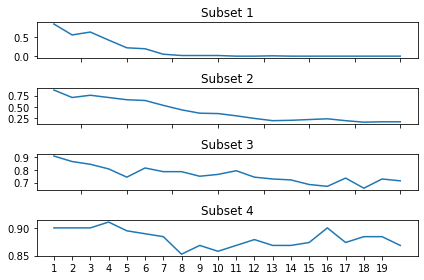

In [36]:
fig, axs = plt.subplots(4)
axs[0].plot(np.arange(20)+1, Error_Results[:,0])
axs[0].set_title('Subset 1')
axs[1].plot(np.arange(20)+1, Error_Results[:,1])
axs[1].set_title('Subset 2')
axs[2].plot(np.arange(20)+1, Error_Results[:,2])
axs[2].set_title('Subset 3')
axs[3].plot(np.arange(20)+1, Error_Results[:,3])
axs[3].set_title('Subset 4')
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
plt.sca(axs[3])
plt.xticks(np.arange(19)+1)
plt.show()

In [37]:
# Remove the first 3 columns of U
newU = U[:,3:20]
# Repeat the experiment for all 4 subsets with k =1 to 17
Error_Results = np.zeros((17,4))
for subset_num in range(1,5):
    Input_Name = "Input"+str(subset_num)
    Output_Name = "Output"+str(subset_num)
    
    Test_Input = All_Test_Data[Input_Name]
    Test_Output = All_Test_Data[Output_Name]
    for k in range(1,18):
        Error_Results[k-1,subset_num-1] = test_pca(Training_Input, Training_output, Test_Input, Test_Output, newU, k)
print("Best Error")
print(np.min(Error_Results, axis=0))

Best Error
[0.01666667 0.13333333 0.66428571 0.85789474]


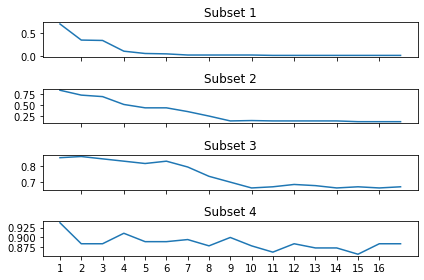

In [38]:
fig, axs = plt.subplots(4)
axs[0].plot(np.arange(17)+1, Error_Results[:,0])
axs[0].set_title('Subset 1')
axs[1].plot(np.arange(17)+1, Error_Results[:,1])
axs[1].set_title('Subset 2')
axs[2].plot(np.arange(17)+1, Error_Results[:,2])
axs[2].set_title('Subset 3')
axs[3].plot(np.arange(17)+1, Error_Results[:,3])
axs[3].set_title('Subset 4')
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
plt.sca(axs[3])
plt.xticks(np.arange(16)+1)
plt.show()

For the subset1 we have a perfect classification in the first experiment with a best error ratio of 0. However, as shown in the second experiment, when we excluded the first 3 PCs, the error increses to around 0.016. Because the first several PCs contribute most to the distribution of transformed original dataset, excluding them will shift the distribution and make it more difficult to conduct KNN classification. 

Likewise, as the light condition changes, distribution of the original data in subset2-4 also shift from that of subset0, leading to the increase of error ratio in the first experiment. Interestingly, we see that in thes cases removing the first 3 PCs do not necessarily increase the error ratio, which furthur shows that we have projected subset2-4 onto wrong subspaces using the wrong transformation matrix U.